In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import ScalarFormatter, MultipleLocator
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import zscore

In [5]:
data_route = "C:\\Users\\SSAFY\\workspace\\final_project\\dataset\\dataset_sample_10percent.csv"
data = pd.read_csv(data_route, encoding='utf-8')

In [81]:
# 원하는 퍼센타일 값을 설정 (예: 상위 10%를 사용하려면 10을 입력)
percentile_threshold = 1

In [86]:
# 선택한 퍼센타일 임계값 계산
top_percentile_value = data['buy_count'].quantile(1 - (percentile_threshold / 100))

# 선택한 퍼센타일 기준으로 필터링
high_buy_data = data[data['buy_count'] >= top_percentile_value].copy()

# review_score의 z-score 계산
high_buy_data['review_score_zscore'] = zscore(high_buy_data['review_score'])

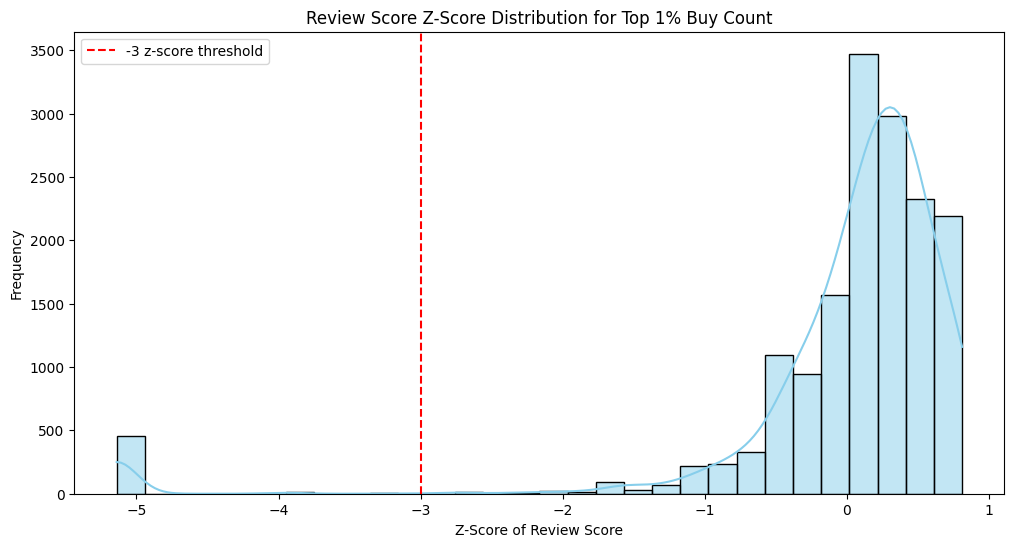

In [87]:
# z-score 히스토그램 시각화
plt.figure(figsize=(12, 6))
sns.histplot(high_buy_data['review_score_zscore'], bins=30, kde=True, color='skyblue')
plt.axvline(-3, color='red', linestyle='--', label='-3 z-score threshold')
plt.title(f'Review Score Z-Score Distribution for Top {percentile_threshold}% Buy Count')
plt.xlabel('Z-Score of Review Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [88]:
# zscore가 -3보다 작고, review_count가 1이상인 상품 조회
high_buy_data[(high_buy_data['review_score_zscore'] < -3) & (high_buy_data['review_count'] > 0)][['prd_id', 'view_name', 'buy_count', 'review_score', 'review_count','review_score_zscore']]

,prd_id,view_name,buy_count,review_score,review_count,review_score_zscore
17859,58536077,허리가 편한 바른자세 웰빙 등받이 좌식의자 허리받침,56,20,1,-3.949164
118375,66655919,프롬네이처 칠면조 슬라이스 300g,63,20,1,-3.949164
151790,15318093,[KAXIYA] 실전 사용 가능한 그립 교정 및 슬라이스 방지 그립가이드,109,20,1,-3.949164
534142,23771311,[432403][알파] 클리어케이스 B8 가로형(낱개/9161mm),103,20,1,-3.949164
571333,96288590,주방타일시트지 발포 방수 부엌 벽 스티커 기름튐 오염방지,49,20,1,-3.949164
575803,37485027,판도라by비비안 밴드가 안보이는 팬츠삭스 1족 psk3820,189,20,2,-3.949164
576891,50872229,JNJ 6001 로즈 망사팬티 1매 여성삼각 레이스팬티,86,20,1,-3.949164
859168,1043431627,"[택가 399,000원](GS단독)후드집업핸드메이드울코트_P3DCT012M",279,20,1,-3.949164
891213,1051573813,메이킹유 1694퀴니스커트,100,33,9,-3.175584
1079704,1046475622,샘표 순작 애플시나몬 티백 20T,53,20,1,-3.949164
